In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
Sars2_train = pd.read_csv("Sars2_train.csv")
Sars2_train.shape

(52, 21)

In [3]:
Sars2_train.head()

,MolID,mol,Class,Model,IC50,EXP,MolecularWeight,ExactMass,HeavyAtoms,Rings,...,MolecularVolume,RotatableBonds,HydrogenBondDonors,HydrogenBondAcceptors,SLogP,SMR,TPSA,Fsp3Carbons,Sp3Carbons,MolecularComplexity
0,Triparanol,CC[NH](CCOc1ccc(cc1)[C@](c1ccc(cc1)C)(Cc1ccc(c...,1,Train,7.05,-7.05,440.02,439.2278,31,3,...,428.55,10,2,3,7.25,133.24,38.36,0.33,9,56
1,Tilorone,CC[NH](CCOc1ccc2c(c1)C(=O)c1c2ccc(c1)OCC[NH](C...,1,Train,4.09,-7.38,414.58,414.2882,30,3,...,417.35,12,2,5,7.15,130.24,53.33,0.48,12,55
2,Tideglusib,O=c1sn(c(=O)n1Cc1ccccc1)c1cccc2c1cccc2,1,Train,1.55,-7.95,334.39,334.0776,24,4,...,275.91,3,0,4,5.06,97.44,44.00,0.05,1,62
3,Tetrandrine,COc1c(OC)cc2c3c1Oc1cc4c(cc1OC)CC[NH]([C@H]4Cc1...,1,Train,3.00,-7.56,626.78,626.3356,46,8,...,580.38,4,2,8,8.26,183.10,77.32,0.37,14,60
4,Shikonin,CC(=CC[C@H](C1=CC(=O)c2c(C1=O)c(O)ccc2O)O)C,0,Train,15.75,-6.58,288.30,288.0998,21,2,...,275.21,3,3,5,2.41,77.08,94.83,0.25,4,38


In [16]:
Sars2_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,52.0,0.750000,0.437237,0.0000,0.750000,1.0000,1.00000,1.0000
IC50,52.0,15.061731,68.791027,0.0400,1.752500,4.1100,7.52000,500.0000
EXP,52.0,-7.553846,0.999481,-10.1300,-7.882500,-7.3750,-7.01250,-4.5200
MolecularWeight,52.0,482.569038,195.913518,157.1000,382.730000,463.0400,577.19500,1202.6100
ExactMass,52.0,482.059537,195.851362,157.0288,382.491875,462.7375,576.80745,1201.8414
HeavyAtoms,52.0,34.038462,14.336244,11.0000,25.500000,33.5000,40.25000,85.0000
Rings,52.0,3.519231,2.081575,0.0000,2.000000,4.0000,4.25000,8.0000
AromaticRings,52.0,1.807692,1.253051,0.0000,1.000000,2.0000,3.00000,4.0000
MolecularVolume,52.0,455.557692,201.685598,117.8900,318.580000,437.2400,534.70250,1263.6000
RotatableBonds,52.0,8.250000,4.838064,1.0000,4.000000,8.0000,13.00000,17.0000


In [26]:
# is there any missing values
Sars2_train.isnull().sum().sum()

0

In [7]:
# number of train
(Sars2_train["Model"] == "Train").sum()

37

In [11]:
# number of test
(Sars2_train["Model"] != "Train").sum()

15

In [14]:
# overall positive rate
Sars2_train["Class"].mean()

0.75

In [10]:
# positive rate in train
Sars2_train.loc[Sars2_train["Model"] == "Train","Class"].mean()

0.8108108108108109

In [12]:
# positive rate in test
Sars2_train.loc[Sars2_train["Model"] != "Train","Class"].mean()

0.6

Latter we should split such that train and test have approximately the same ratio for possitive class. 

In [28]:
# correlation between features and EXP
X_train = Sars2_train.drop(["mol", "Class", "Model", "IC50", "EXP"], axis="columns")
corr_with_target = X_train.corrwith(Sars2_train["EXP"]).abs()
corr_with_target = corr_with_target.sort_values(ascending=False)
corr_with_target

Rings                    0.291373
TPSA                     0.241718
HydrogenBondDonors       0.226461
Sp3Carbons               0.223991
MolecularWeight          0.221527
ExactMass                0.221296
HydrogenBondAcceptors    0.218606
HeavyAtoms               0.213190
Fsp3Carbons              0.188334
MolecularVolume          0.178545
SMR                      0.171796
RotatableBonds           0.071002
MolecularComplexity      0.039350
SLogP                    0.022822
AromaticRings            0.005142
dtype: float64

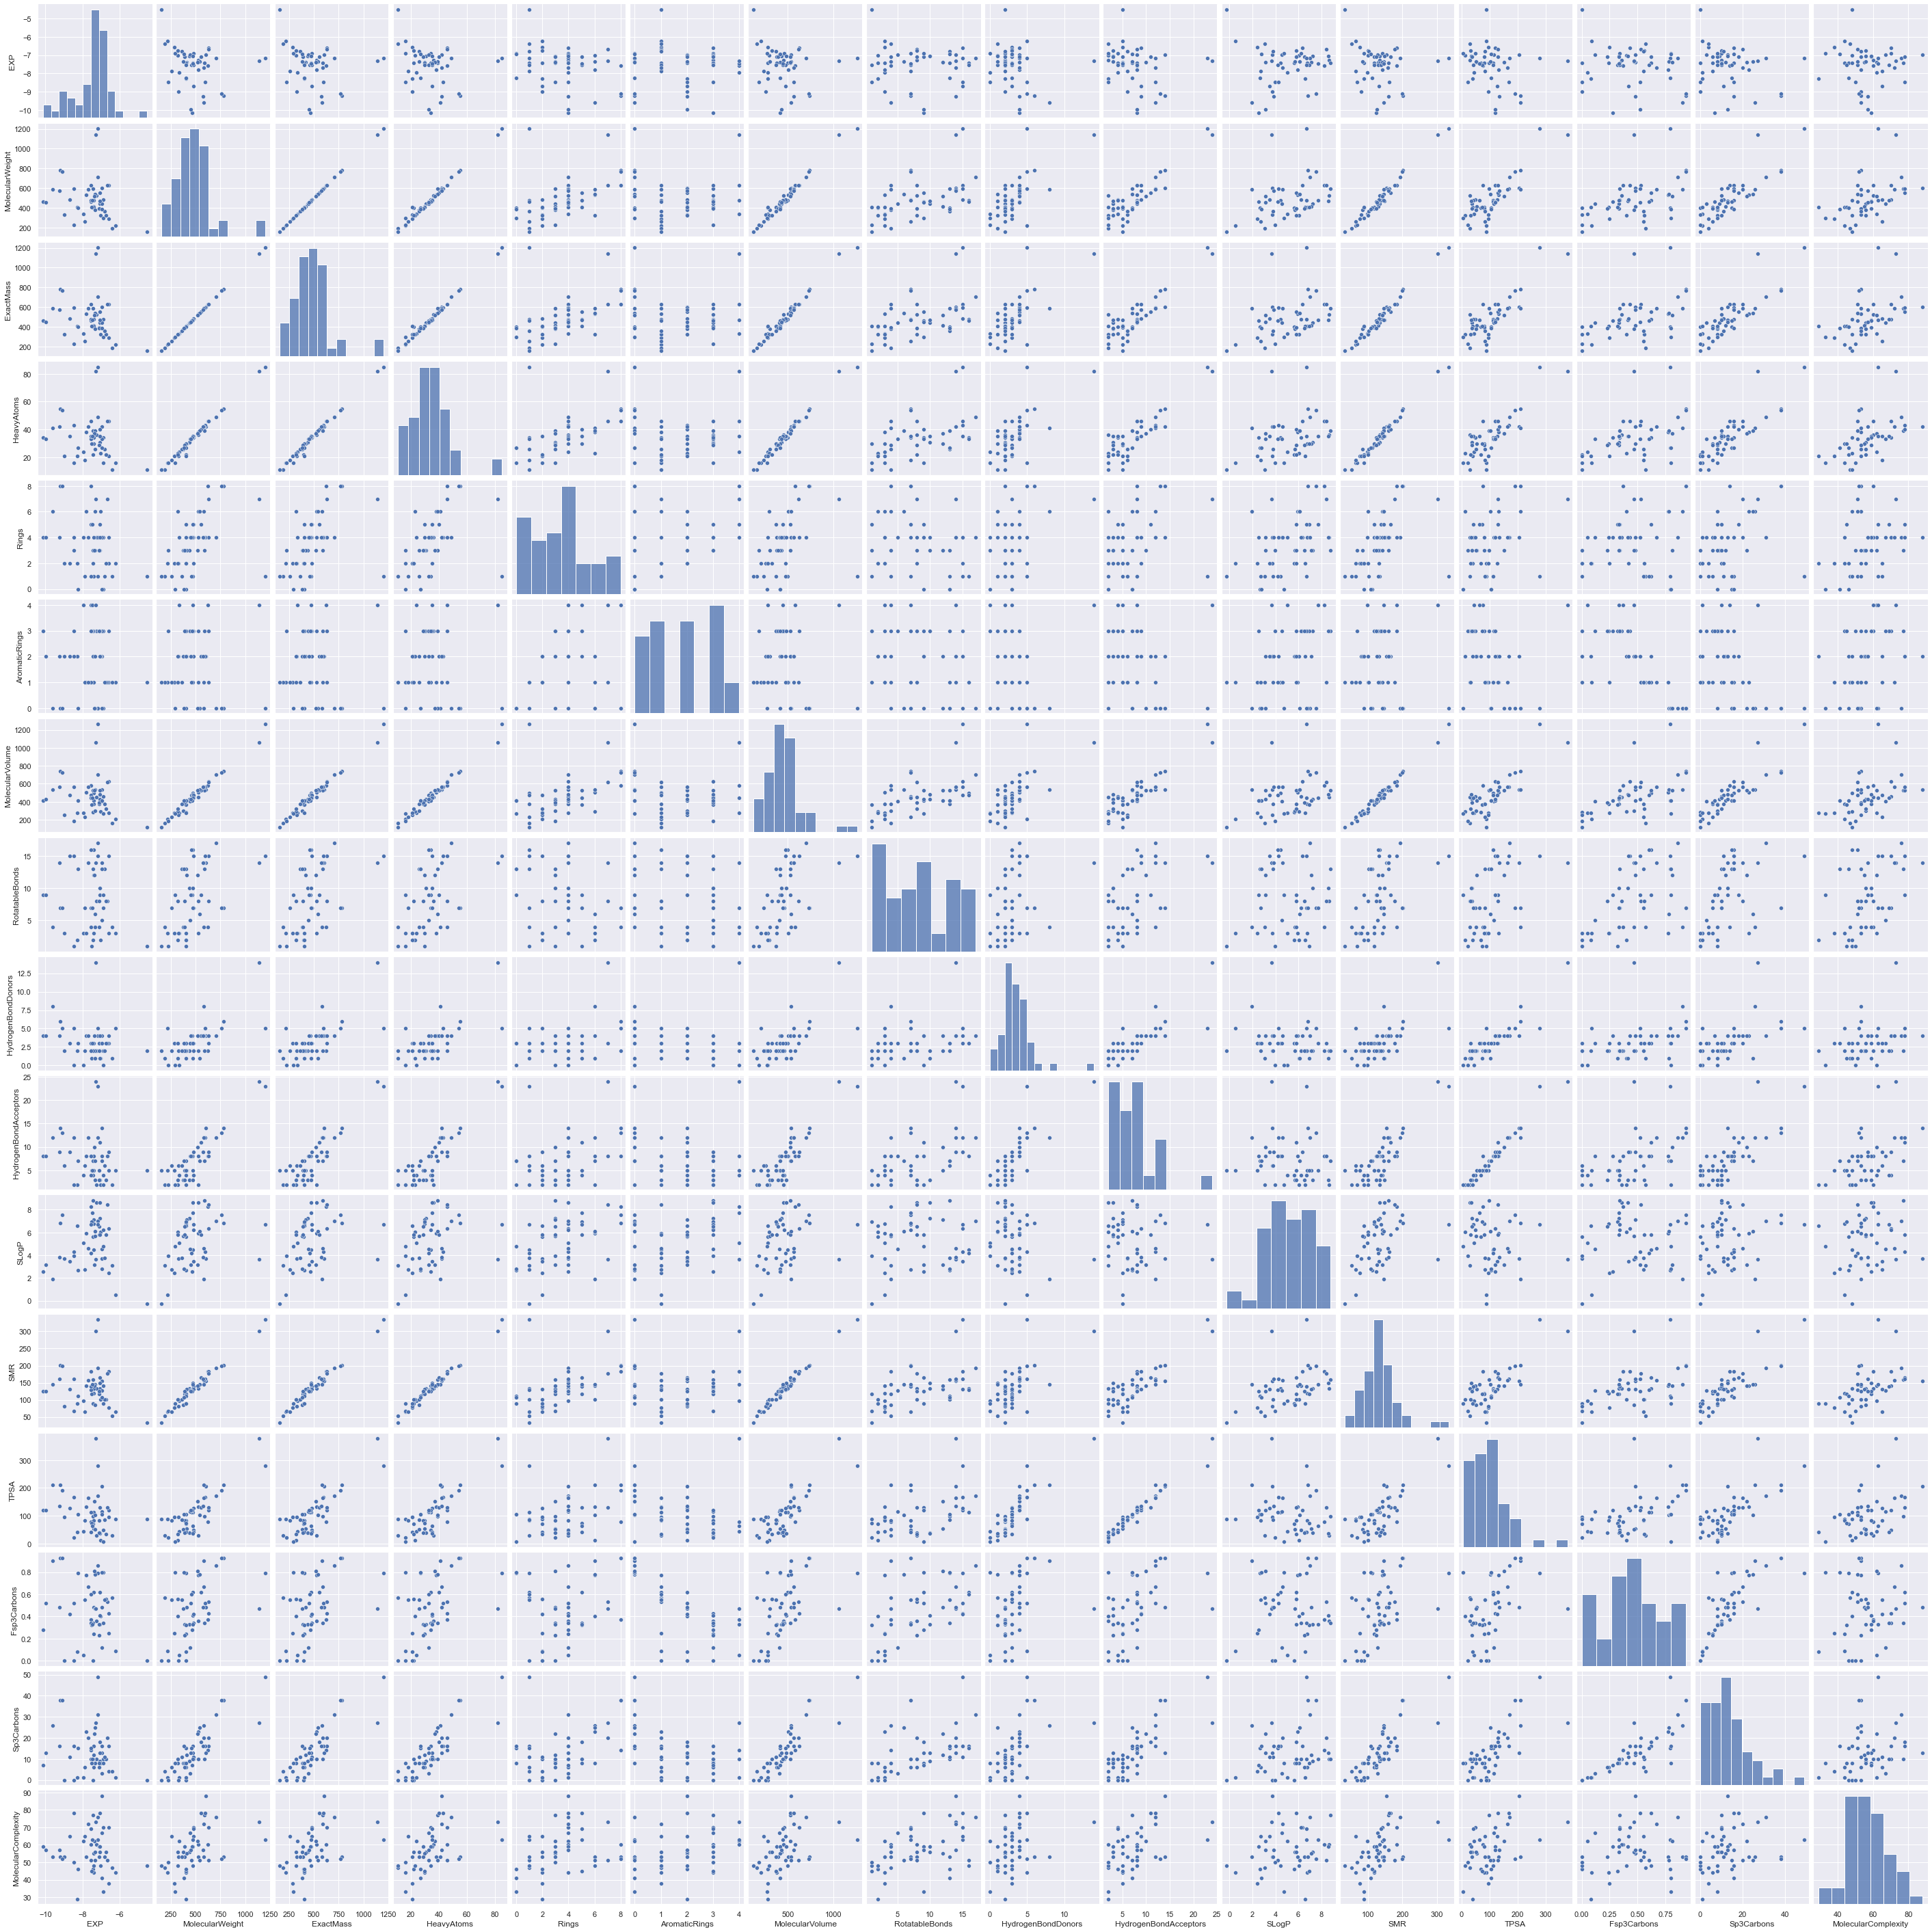

In [23]:
X_y_train = Sars2_train.drop(["mol", "Class", "Model", "IC50"], axis="columns")
sns.pairplot(X_y_train)

<AxesSubplot:>

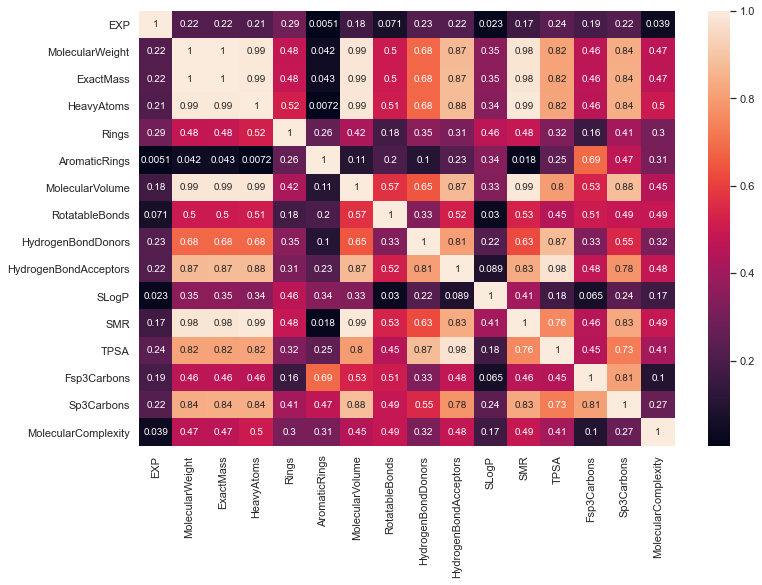

In [35]:
# correlation matrix
corr_mat = X_y_train.corr().abs()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
sns.heatmap(corr_mat, annot=True, ax=ax)

`MolecularWeight` is highly correlated with `ExactMass` and `HeavyAtoms`. `MolecularVolume` is also highly correlated with `MolecularWeight`, `ExactMass` and `HeavyAtoms`. And more. In generall correlated features are redundant and can be removed without affecting performance of machine learning models.

In [63]:
def plot_hist(df, y_class, ncols=3):
    poss = y_class == 1
    neg = ~poss
    
    var_names = df.columns
    n_vars = len(var_names)
    nrows = int(np.ceil(n_vars / ncols))
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*4))
    plt.subplots_adjust(hspace=0.5)
    
    ax = ax.flatten()
    
    for i, var in enumerate(var_names):
        sns.kdeplot(df.loc[poss, var], ax=ax[i], label="Class 1")
        sns.kdeplot(df.loc[neg, var], ax=ax[i], label="Class 0")
        ax[i].legend()

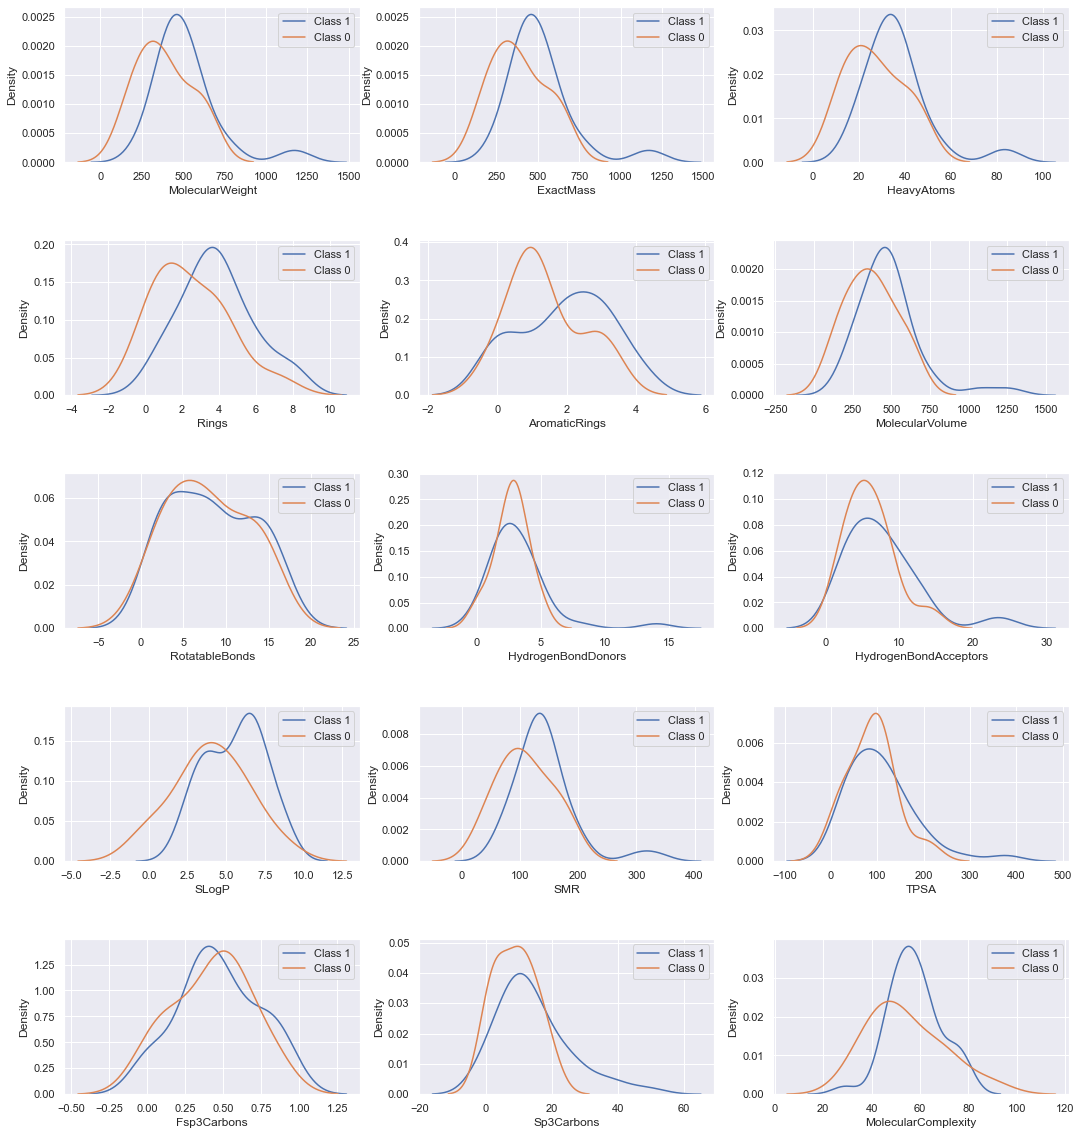

In [64]:
X_train = Sars2_train.drop(["MolID", "mol", "Model", "IC50", "Class", "EXP"], axis="columns")
y_class = Sars2_train["Class"]

plot_hist(X_train, y_class)